In [1]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
from functools import partial

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator


print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
# session = tf.compat.v1.Session(config=config)
session = tf.compat.v1.InteractiveSession(config=config)

Num GPUs Available:  1


In [2]:
my_dir = os.getcwd()  # grabs current work dir
all_file_paths = os.listdir()  # grabs all items in current work dir

FOLDER_TO_ACCESS = 'traindata_pp_structure'
data_path = [data for data in all_file_paths if FOLDER_TO_ACCESS in data.lower()]  # searches for data folder and retrieves
train_folder_path = os.path.join(my_dir, data_path[0])  # joins data folder and current work dir to get picture path
all_classifications = os.listdir(train_folder_path)  # list of classification fodlers

In [3]:
# IM_ORIG = np.array([640, 480])
# IM_SCALE = 2

# IM = IM_ORIG / IM_SCALE
# IM = [int(x) for x in np.append(IM, 3).tolist()]
IM = (299, 299)

train_datagen = ImageDataGenerator(
    validation_split=0.2) # set validation split

train_it = train_datagen.flow_from_directory(
    train_folder_path,
    target_size = IM,
    subset='training',
    class_mode='sparse',
    shuffle=True,
    batch_size=28)

validate_it = train_datagen.flow_from_directory(
    train_folder_path,
    target_size = IM,
    subset='validation',
    class_mode='sparse',
    shuffle=True,
    batch_size=28)

Found 821 images belonging to 5 classes.
Found 204 images belonging to 5 classes.


In [4]:
model = keras.models.Sequential()

# new_input = keras.Input(shape=IM)
model.add(InceptionV3(include_top=False, input_shape=(299, 299, 3), weights="imagenet", pooling='avg'))
model.add(Flatten())
model.add(Dense(units=5, activation='softmax'))


In [5]:
model.summary()
model.compile(loss="sparse_categorical_crossentropy", optimizer='adam', metrics=['accuracy'])


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Model)         (None, 2048)              21802784  
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 5)                 10245     
Total params: 21,813,029
Trainable params: 21,778,597
Non-trainable params: 34,432
_________________________________________________________________


In [6]:
history = model.fit(train_it,
                    steps_per_epoch=train_it.n // train_it.batch_size,
                    epochs=30, verbose=1,
                    callbacks=None, validation_data=validate_it,
                    validation_steps=None,
                    class_weight=None, max_queue_size=2,
                    workers=1, use_multiprocessing=False,
                    shuffle=False, initial_epoch=0)


  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 29 steps, validate for 8 steps
Epoch 1/30
29/29 [==============================] - 87s 3s/step - loss: 0.9324 - accuracy: 0.6466 - val_loss: 434.4546 - val_accuracy: 0.1275
Epoch 2/30
29/29 [==============================] - 78s 3s/step - loss: 0.5365 - accuracy: 0.8177 - val_loss: 12.4548 - val_accuracy: 0.4755
Epoch 3/30
29/29 [==============================] - 78s 3s/step - loss: 0.3179 - accuracy: 0.8842 - val_loss: 18.8619 - val_accuracy: 0.4755
Epoch 4/30
29/29 [==============================] - 92s 3s/step - loss: 0.2529 - accuracy: 0.9175 - val_loss: 1.5121 - val_accuracy: 0.5343
Epoch 5/30
29/29 [==============================] - 80s 3s/step - loss: 0.2592 - accuracy: 0.9076 - val_loss: 3.3525 - val_accuracy: 0.5196
Epoch 6/30
29/29 [==============================] - 80s 3s/step - loss: 0.1763 - accuracy: 0.9384 - val_loss: 2.3812 - val_accuracy: 0.4755
Epoch 7/30
29/29 [==============================] - 85s 3s/step -

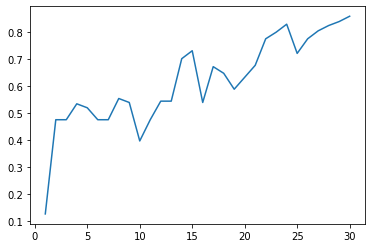

In [8]:
sns.lineplot(np.linspace(1,30,30), history.history['val_accuracy'])